In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
from google.colab import files

uploaded = files.upload()   # this will open a file picker in Colab


Saving breast-cancer.csv to breast-cancer.csv


In [4]:
import pandas as pd

df = pd.read_csv("breast-cancer.csv")
print(df.shape)
df.head()


(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Check for missing values
print(df.isnull().sum())

# Features & target (update 'target' to the correct column name from dataset)
X = df.drop(columns=['diagnosis'])   # assuming 'diagnosis' is the target
y = df['diagnosis']

# Encode target if categorical (M=1, B=0)
y = y.map({'M':1, 'B':0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# Linear SVM
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train, y_train)

# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)


SVC(C=1, random_state=42)

In [7]:
# Linear kernel
y_pred_lin = svm_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_lin))
print(classification_report(y_test, y_pred_lin))

# RBF kernel
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


Linear SVM Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

RBF SVM Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [8]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.9736263736263737


In [9]:
best_svm = grid.best_estimator_
cv_scores = cross_val_score(best_svm, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.60526316 0.55263158 0.63157895 0.61403509 0.62831858]
Mean CV Accuracy: 0.6063654712001242


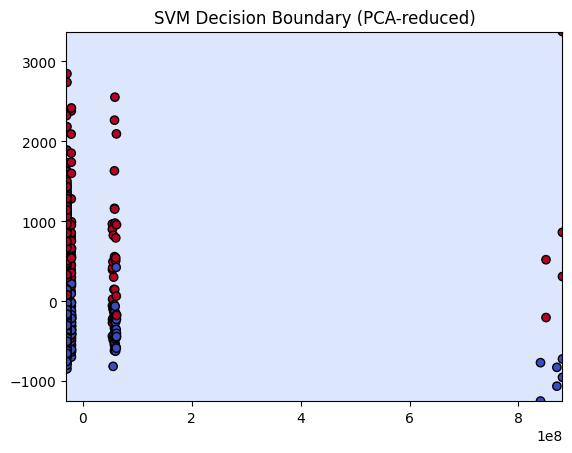

In [10]:
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train on reduced data
svm_vis = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_vis.fit(X_pca, y)

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title("SVM Decision Boundary (PCA-reduced)")
    plt.show()

plot_decision_boundary(svm_vis, X_pca, y)
